WeatherPy

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json 
import time
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy


In [2]:
latLngs=[]
cities=[]

latRange=(-90,90)
lngRange=(-180,180)

lats=np.random.uniform(latRange[0],latRange[1], size=1500) #what does this size 1500 mean
lons=np.random.uniform(lngRange[0],lngRange[1],size=1500)
latsLons=zip(lats,lons)

for latLon in latsLons:
    city= citipy.nearest_city(latLon[0],latLon[1]).city_name
    
    if city not in cities:
        cities.append(city)
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 635


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
cityList = []
print("Beginning Data Retrieval     ")
print("-----------------------------")
recordCount = 1
setCount = 1
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        setCount += 1
        recordCount = 0
    cityURL = url + "&q=" + city
    print("Processing Record %s of Set %s | %s" % (recordCount, setCount, city))
    recordCount += 1
    try:
        response = requests.get(cityURL).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]
        cityList.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mae hong son
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | beira
Processing Record 5 of Set 1 | port hedland
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | fukue
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | guerrero negro
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | folkestone
Processing Record 14 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 15 of Set 1 | chardara
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | novyy urengoy
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | salalah
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 o

Processing Record 38 of Set 4 | namibe
Processing Record 39 of Set 4 | jumla
Processing Record 40 of Set 4 | palmer
Processing Record 41 of Set 4 | nemuro
Processing Record 42 of Set 4 | port-gentil
Processing Record 43 of Set 4 | chokurdakh
Processing Record 44 of Set 4 | havelock
Processing Record 45 of Set 4 | mandalgovi
Processing Record 46 of Set 4 | qaqortoq
Processing Record 47 of Set 4 | kemptville
Processing Record 48 of Set 4 | lac du bonnet
Processing Record 49 of Set 4 | hilo
Processing Record 0 of Set 5 | sao filipe
Processing Record 1 of Set 5 | pisco
Processing Record 2 of Set 5 | christchurch
Processing Record 3 of Set 5 | maragogi
Processing Record 4 of Set 5 | moshi
Processing Record 5 of Set 5 | atar
Processing Record 6 of Set 5 | vila franca do campo
Processing Record 7 of Set 5 | dunedin
Processing Record 8 of Set 5 | biltine
Processing Record 9 of Set 5 | dikson
Processing Record 10 of Set 5 | kuching
Processing Record 11 of Set 5 | mahebourg
Processing Record 12 

Processing Record 29 of Set 8 | saint combs
City not found. Skipping...
Processing Record 30 of Set 8 | trairi
Processing Record 31 of Set 8 | egvekinot
Processing Record 32 of Set 8 | antalaha
Processing Record 33 of Set 8 | qafsah
City not found. Skipping...
Processing Record 34 of Set 8 | rolla
Processing Record 35 of Set 8 | zhangye
Processing Record 36 of Set 8 | great bend
Processing Record 37 of Set 8 | nikolayevka
Processing Record 38 of Set 8 | dudinka
Processing Record 39 of Set 8 | skibbereen
Processing Record 40 of Set 8 | oussouye
Processing Record 41 of Set 8 | muros
Processing Record 42 of Set 8 | ketchikan
Processing Record 43 of Set 8 | kaitangata
Processing Record 44 of Set 8 | rumford
Processing Record 45 of Set 8 | ulladulla
Processing Record 46 of Set 8 | panguipulli
Processing Record 47 of Set 8 | hurricane
Processing Record 48 of Set 8 | bandar-e lengeh
Processing Record 49 of Set 8 | ambilobe
Processing Record 0 of Set 9 | camacha
Processing Record 1 of Set 9 | 

Processing Record 16 of Set 12 | ostrovnoy
Processing Record 17 of Set 12 | mana
Processing Record 18 of Set 12 | hohhot
Processing Record 19 of Set 12 | bathsheba
Processing Record 20 of Set 12 | mahuva
Processing Record 21 of Set 12 | blind river
Processing Record 22 of Set 12 | barabai
Processing Record 23 of Set 12 | birjand
Processing Record 24 of Set 12 | zwedru
Processing Record 25 of Set 12 | denpasar
Processing Record 26 of Set 12 | alice springs
Processing Record 27 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 28 of Set 12 | sorkjosen
Processing Record 29 of Set 12 | moree
Processing Record 30 of Set 12 | riyadh
Processing Record 31 of Set 12 | monrovia
Processing Record 32 of Set 12 | dharchula
Processing Record 33 of Set 12 | veseloyarsk
Processing Record 34 of Set 12 | kajaani
Processing Record 35 of Set 12 | kathmandu
Processing Record 36 of Set 12 | mandurah
Processing Record 37 of Set 12 | dhangadhi
Processing Record 38 of Set 12 | katsiveli
City

In [4]:
cityDataDF=pd.DataFrame(cityList)

cityDataDF.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
cityDataDF.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mae hong son,19.3003,97.9685,18.18,49,0,0.95,TH,1677960392
1,qaanaaq,77.4840,-69.3632,-12.32,45,0,3.81,GL,1677960637
2,ushuaia,-54.8000,-68.3000,7.81,61,75,9.26,AR,1677960638
3,beira,-19.8436,34.8389,25.08,89,37,3.75,MZ,1677960638
4,port hedland,-20.3167,118.5667,27.03,74,100,3.09,AU,1677960639


In [6]:
cityDataDF.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
cityDataDF = pd.read_csv("output_data/cities.csv", index_col="City_ID")

cityDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mae hong son,19.3003,97.9685,18.18,49,0,0.95,TH,1677960392
1,qaanaaq,77.4840,-69.3632,-12.32,45,0,3.81,GL,1677960637
2,ushuaia,-54.8000,-68.3000,7.81,61,75,9.26,AR,1677960638
3,beira,-19.8436,34.8389,25.08,89,37,3.75,MZ,1677960638
4,port hedland,-20.3167,118.5667,27.03,74,100,3.09,AU,1677960639


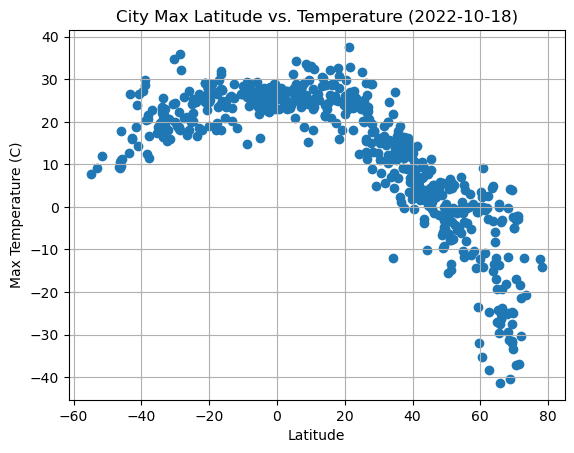

In [8]:
plt.scatter(cityDataDF["Lat"],cityDataDF["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.show()

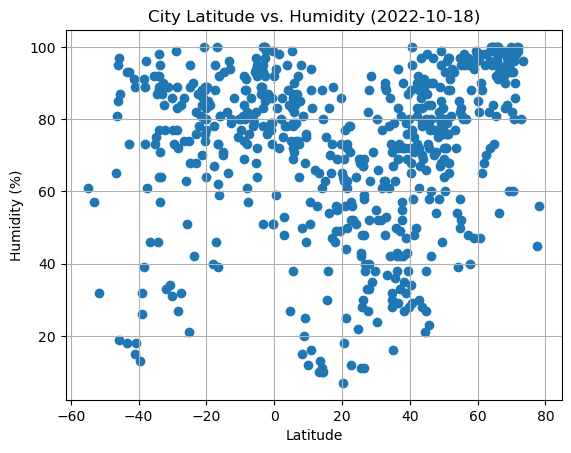

In [9]:
plt.scatter(cityDataDF["Lat"],cityDataDF["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.show()

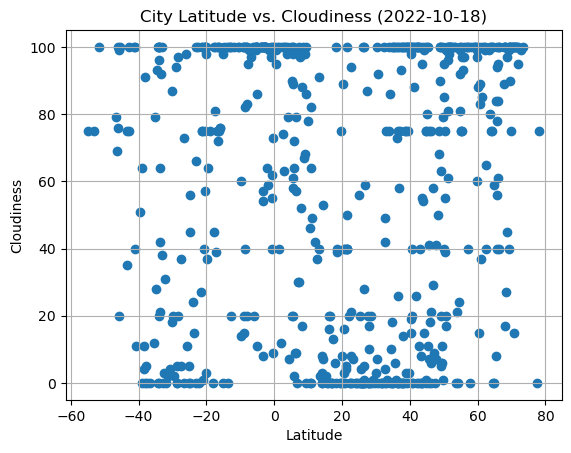

In [10]:
plt.scatter(cityDataDF["Lat"],cityDataDF["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.show()

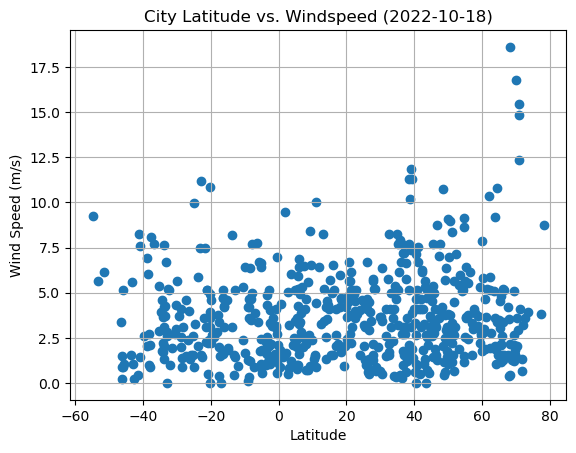

In [11]:
plt.scatter(cityDataDF["Lat"],cityDataDF["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Windspeed (2022-10-18)")
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.show()

In [12]:

northern_hemi_df = cityDataDF.loc[(cityDataDF["Lat"] >= 0)]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mae hong son,19.3003,97.9685,18.18,49,0,0.95,TH,1677960392
1,qaanaaq,77.4840,-69.3632,-12.32,45,0,3.81,GL,1677960637
6,fukue,32.6881,128.8419,12.11,63,4,8.24,JP,1677960422
7,tiksi,71.6872,128.8694,-18.38,100,100,0.64,RU,1677960642
9,albany,42.6001,-73.9662,3.15,88,100,1.83,US,1677960644


In [17]:
southern_hemi_df = cityDataDF.loc[(cityDataDF["Lat"] <= 0)]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,7.81,61,75,9.26,AR,1677960638
3,beira,-19.8436,34.8389,25.08,89,37,3.75,MZ,1677960638
4,port hedland,-20.3167,118.5667,27.03,74,100,3.09,AU,1677960639
5,port alfred,-33.5906,26.8910,20.66,95,21,3.71,ZA,1677960640
8,rikitea,-23.1203,-134.9692,26.57,76,100,7.49,PF,1677960643


Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8814559151560404


Text(5.8, 0.8, 'y=-0.73x+35.67')

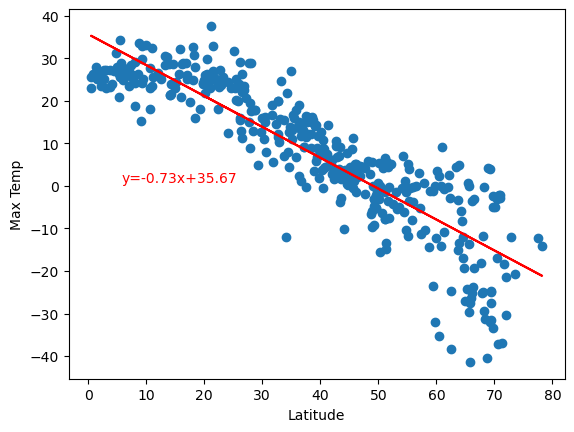

In [31]:
import scipy.stats as st

(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
regress_values=northern_hemi_df["Lat"] * slope + intercept

plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

correlation= st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
                        
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

print(f"The r-value is: {correlation [0]}")

line_eq= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.annotate(line_eq,(5.8,0.8), fontsize=10, color="red")

The r-value is:0.5923115565324837


Text(40, 10, 'y=0.22x+27.68')

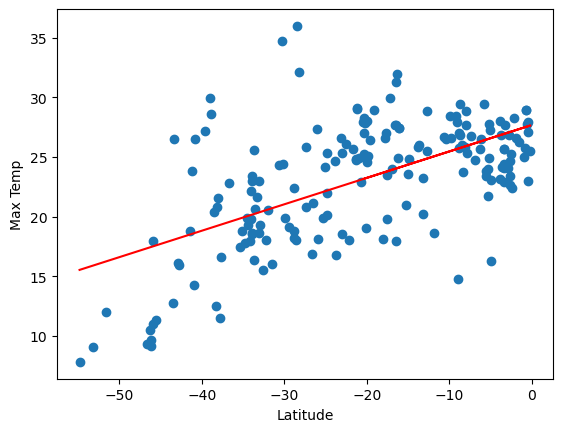

In [42]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
regress_values=southern_hemi_df["Lat"] * slope + intercept

plt.plot(southern_hemi_df["Lat"],regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

correlation= st.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
print(f"The r-value is:{correlation[0]}")

line_eq= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.annotate(line_eq,(40,10), fontsize=10, color="red")

There is a stronger relationship between latitude and max temperature in the northern hemisphere than compared to the southern hemisphere.

Humidity vs. Latitude Linear Regression Plot

The r-value is:0.37162738801512146


Text(40, 10, 'y=0.43x+53.24')

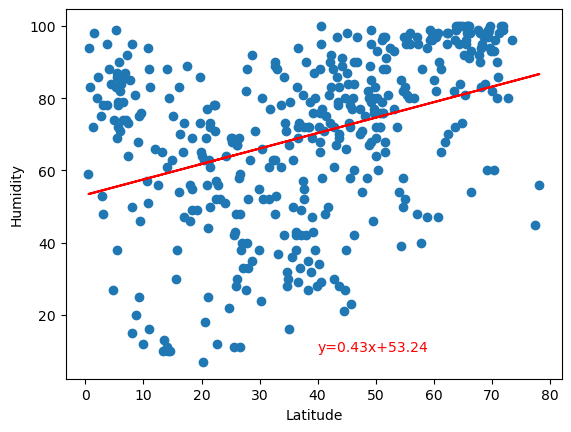

In [68]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
regress_values=northern_hemi_df["Lat"] * slope + intercept

plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

correlation= st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
print(f"The r-value is:{correlation[0]}")


line_eq= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.annotate(line_eq,(40,10), fontsize=10, color="red")

The r-value is:0.3078060157386987


Text(-40, 40, 'y=0.44x+84.82')

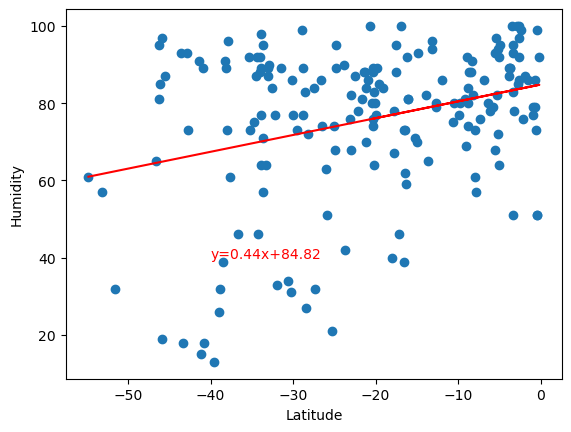

In [69]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
regress_values=southern_hemi_df["Lat"] * slope + intercept

plt.plot(southern_hemi_df["Lat"],regress_values,"r-")


correlation= st.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
print(f"The r-value is:{correlation[0]}")


plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

line_eq= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.annotate(line_eq,(-40,40), fontsize=10, color="red")

There is a weak relationship between latitude and humidity in both the northern and southern hemispheres.

Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.2767426477085712


Text(60, 30, 'y=0.57x+32.52')

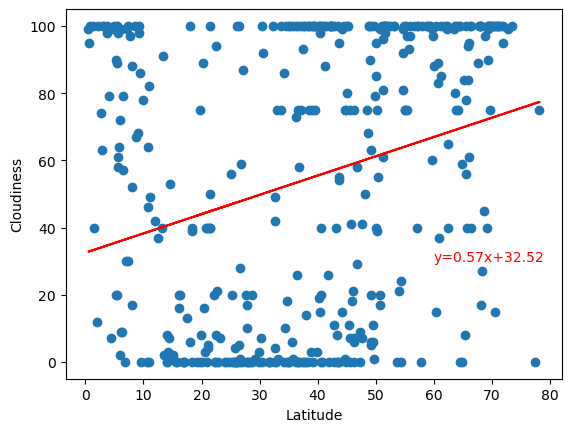

In [49]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
regress_values=northern_hemi_df["Lat"] * slope + intercept

plt.plot(northern_hemi_df["Lat"],regress_values,"r-")


correlation= st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
print(f"The r-value is:{correlation[0]}")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

line_eq= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.annotate(line_eq,(60,30), fontsize=10, color="red")

The r-value is:0.29229375669519164


Text(-50, 30, 'y=0.82x+80.16')

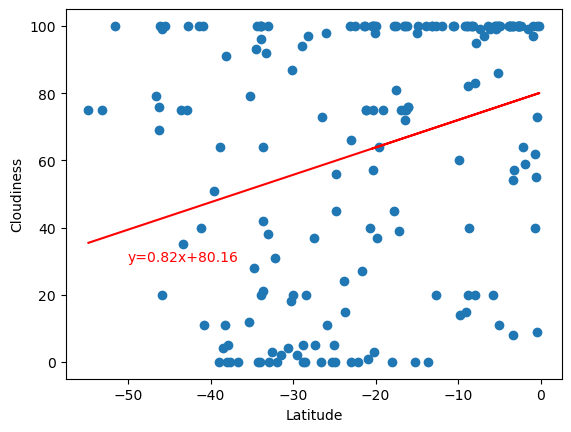

In [55]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
regress_values=southern_hemi_df["Lat"] * slope + intercept

plt.plot(southern_hemi_df["Lat"],regress_values,"r-")


correlation= st.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
print(f"The r-value is:{correlation[0]}")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
                                                          
                                                                 
line_eq= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.annotate(line_eq,(-50,30), fontsize=10, color="red")

There seems to be a very weak relationship between latitude and cloudiness in both the nothern and southern hemispheres.

Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.08415886840945877


Text(30, 15, 'y=0.01x+3.39')

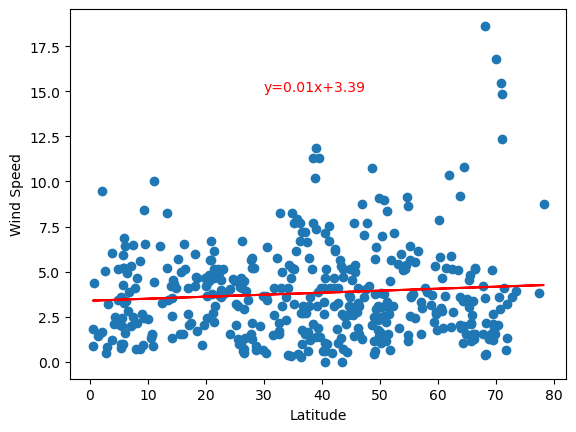

In [70]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
regress_values=northern_hemi_df["Lat"] * slope + intercept

plt.plot(northern_hemi_df["Lat"],regress_values,"r-")

correlation= st.pearsonr(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
print(f"The r-value is:{correlation[0]}")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

line_eq= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.annotate(line_eq,(30,15), fontsize=10, color="red")

The r-value is:-0.09919206675425643


Text(-30, 10, 'y=-0.02x+2.95')

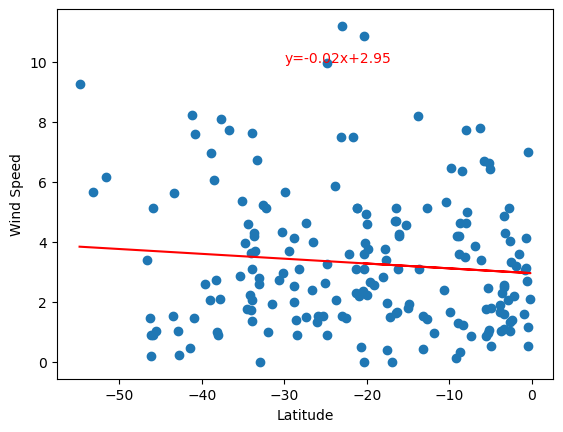

In [66]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
regress_values=southern_hemi_df["Lat"] * slope + intercept

plt.plot(southern_hemi_df["Lat"],regress_values,"r-")


correlation= st.pearsonr(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
print(f"The r-value is:{correlation[0]}")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

line_eq= "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.annotate(line_eq,(-30,10), fontsize=10, color="red")

There seems to be a non-existent relationship between latitude and wind  speed no matter no location.